## SNR Hacking

In [1]:

import pybliss

import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt



In [2]:
data_loc = "/datasets/nathan/datasets/voyager_2020_data/"


In [3]:
cadence = pybliss.cadence([[f"{data_loc}/single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.h5",
                    f"{data_loc}/single_coarse_guppi_59046_80672_DIAG_VOYAGER-1_0013.rawspec.0000.h5",
                    f"{data_loc}/single_coarse_guppi_59046_81310_DIAG_VOYAGER-1_0015.rawspec.0000.h5"
                    ],
                    [f"{data_loc}/single_coarse_guppi_59046_80354_DIAG_VOYAGER-1_0012.rawspec.0000.h5"],
                    [f"{data_loc}/single_coarse_guppi_59046_80989_DIAG_VOYAGER-1_0014.rawspec.0000.h5"],
                    [f"{data_loc}/single_coarse_guppi_59046_81628_DIAG_VOYAGER-1_0016.rawspec.0000.h5"]])

In [10]:
flagged_cadence = pybliss.flaggers.flag_filter_rolloff(cadence, .2)

flagged_cadence = pybliss.flaggers.flag_spectral_kurtosis(flagged_cadence, .02, 10)


spec kurtosis with M=16 and N=51
spec kurtosis with M=16 and N=51
spec kurtosis with M=16 and N=51
spec kurtosis with M=16 and N=51
spec kurtosis with M=16 and N=51
spec kurtosis with M=16 and N=51


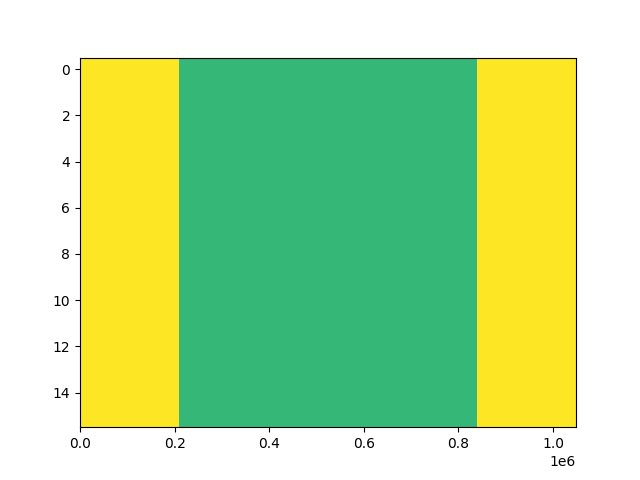

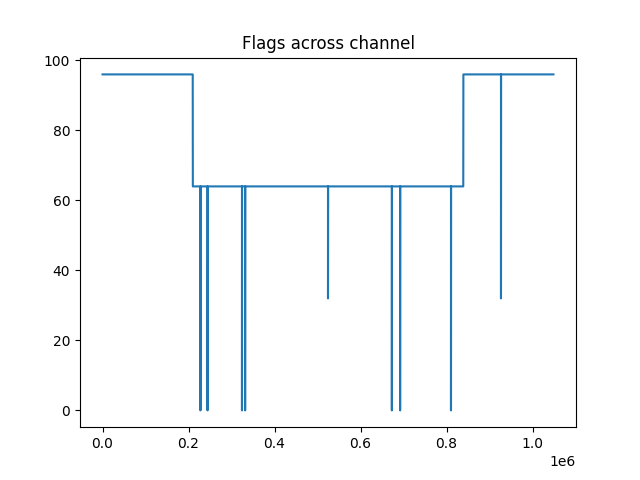

In [11]:
mask = np.from_dlpack(flagged_cadence.observations[1].scans[0].mask)

plt.figure()
plt.imshow(mask, aspect="auto", interpolation="none")

plt.figure()
plt.title("Flags across channel")
plt.plot(mask.sum(0))

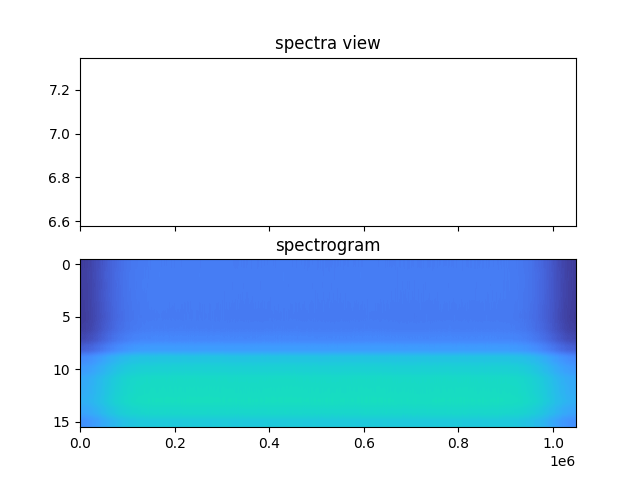

In [6]:
plot_filterbank = flagged_cadence.observations[1].scans[0]
data_arr = np.array(np.from_dlpack(plot_filterbank.data))
data_arr = np.log10(data_arr)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.set_title("spectra view")
ax1.plot(data_arr.mean())
plt.margins(0)

ax2.set_title("spectrogram")
ax2.imshow(data_arr, aspect="auto", cmap="turbo")


In [7]:
plot_filterbank = flagged_cadence.observations[1].scans[0]
data_arr = np.array(np.from_dlpack(plot_filterbank.data))

# noise_est_slice = data_arr[:, int(2.2e5):int(4e5)]

# print(f"noise floor of cropped spectrum: {np.mean(noise_est_slice/1e6)}")
# print(f"noise power of cropped spectrum: {np.var(noise_est_slice)/1e6:1.4e}")

noise_est_options = pybliss.estimators.noise_power_estimate_options()
noise_est_options.masked_estimate = False
noise_est_options.estimator_method = pybliss.estimators.noise_power_estimator.stddev
noise_est = pybliss.estimators.estimate_noise_power(plot_filterbank, noise_est_options)

print(noise_est.noise_floor)
print(noise_est.noise_power)

noise_est_options = pybliss.estimators.noise_power_estimate_options()
noise_est_options.masked_estimate = True
noise_est_options.estimator_method = pybliss.estimators.noise_power_estimator.stddev
noise_est = pybliss.estimators.estimate_noise_power(plot_filterbank, noise_est_options)

print(noise_est.noise_floor)
print(noise_est.noise_power)



10713767.0
48079101231104.0
11368581.0
33399718805504.0
